# Final Project

The final class project is located on github at

https://classroom.github.com/a/qP9GMlhd

Deadline is Wednesday, December 5 at 2pm.

Please submit your work as jupyter notebook (or possibly multiple jupyter notebooks) via github classroom. It is permissible to discuss your project with other students but your submitted work has to be your own. All modeling work should be accompanied by text describing and explaining the work and suitable figures.

Only if you have problem with the github classrom submission is it permissible to submit via email. Please explain the difficulties you experienced with github classroom, so they can be avoided in the future.

## Predicting superconducting transition temperatures from material database.

### Background

We will use materials data for superconducting materials to create machine learning models to predict the superconducting transition temperature of superconducting materials. We will not try to predict the potential of a material to be a superconductor, as this is a question that far exceeds the scope of this final class project.

Your project should use as a guide the relevant sections of the paper 
**Machine learning modeling of superconducting critical temperature**
by Stanev et al.

* published: https://www.sciencedirect.com/science/article/pii/S0927025618304877
* arXiv: https://arxiv.org/abs/1709.02727

However, to simplify data collection, we will use the dataset described in the paper
**A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor**
by Kam Hamidieh 

* arXiv https://arxiv.org/abs/1803.10260
* github https://github.com/khamidieh/predict_tc/blob/master/paper_3.pdf

The dataset is available in the github project: https://github.com/khamidieh/predict_tc
This dataset is based in part on the same sources as the Stanev paper but in its final form differs considerably in the choice of variables from the data used in the Stanev paper. Hence you should not expect identical results.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


### Part 1 - Extract the dataset 
The Hamidieh dataset can be downloaded as part of a github project provided by the author: https://github.com/khamidieh/predict_tc .
However the dataset is in a binary format that is not directly accessible from python. Follow the instructions in the github project to extract datafiles that can be imported into python. All software necessary software is available on the computers in Weniger 412.


#### I extracted the data in R, and saved the materials data as 'unique_m.csv'. I also created a file containing the first eight entries  in table 6 of the Hamidieh paper called 'unique_new.csv'.

In [2]:
new_data = pd.read_csv('unique_new.csv')
unique_data = pd.read_csv('unique_m.csv')

#material data
unique_x = unique_data.columns[1:-2]
unique_y = unique_data.columns[-2]
material_names = unique_data.columns[-1]

In [3]:
# low temperature dataset
lowt_data = unique_data.loc[unique_data[unique_y] < 10]

# Fe dataset
fe_data = unique_data.loc[unique_data['Fe'] >0]

# High Temperature Dataset
htc_data = unique_data.loc[unique_data[unique_y] > 30]

### HTC dataset with Cu and O.
htc_data = unique_data.loc[unique_data['Cu'] > 0].loc[unique_data['O'] >0]

### HTC dataset with Cu and O with roughly 1:2 ratio
htcr_data = unique_data.loc[unique_data['Cu']/unique_data['O'] > .4].loc[unique_data['Cu']/unique_data['O'] < .6]

datax = {'all': unique_data[unique_x], 
         'low' : lowt_data[unique_x], 
         'fe':fe_data[unique_x],
         'htc':htc_data[unique_x],
         'htcr':htcr_data[unique_x]}
datay = {'all': unique_data[unique_y], 
         'low' : lowt_data[unique_y], 
         'fe':fe_data[unique_y],
         'htc':htc_data[unique_y],
         'htcr':htcr_data[unique_y]}

new_datax = new_data[unique_x]
new_datay = new_data[unique_y]

In [8]:
print('New Materials from Hamidieh paper:')
print(new_data[material_names])

New Materials from Hamidieh paper:
0             CsBe(AsO4)
1                 RbAsO2
2                  KSbO2
3                 RbSbO2
4                 CsSbO2
5    K0.8(Li0.2Sn0.76)O2
6         Cs(MoZn)(O3F3)
7           Na3Cd2(IrO6)
Name: material, dtype: object


### Part 2 - Visualization and exploration of the data

Explore and visualize the dataset. Answer  questions like:How many variables? How many entries? Which elements appear how often? Use the figures in the papers as a guide. At the minimum provide figures of super conducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

* $T_c<10K$. 
* Iron based super conductors, i.e. material composition contains $Fe$.
* HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly a $1:2$ ration. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context.




In [9]:
print('# of variables in material dataset: ', len(unique_x))
print('# of Superconducting Materials: ', len(unique_data[unique_y]))

# of variables in material dataset:  86
# of Superconducting Materials:  21263


In [10]:
def vis_data(data, titles):    
    plt.figure(figsize=(8,6))
    plt.xlabel('Critical Temp', fontsize = 16)
    plt.ylabel('# Materials', fontsize = 16)
    plt.title(titles[0], fontsize = 20)
    txt = plt.hist(data['critical_temp'], bins=100)

    elem_counts = []
    for elem in unique_x:
        elem_counts.append(np.count_nonzero(unique_data[elem]))


    plt.figure(figsize=(8,20))
    plt.barh(np.arange(0,len(unique_x)),width=elem_counts)
    plt.yticks(np.arange(0,len(unique_x)),unique_x)
    txt = plt.title(titles[1], fontsize=20)

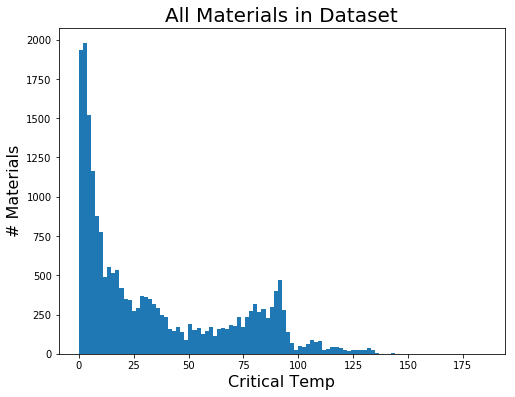

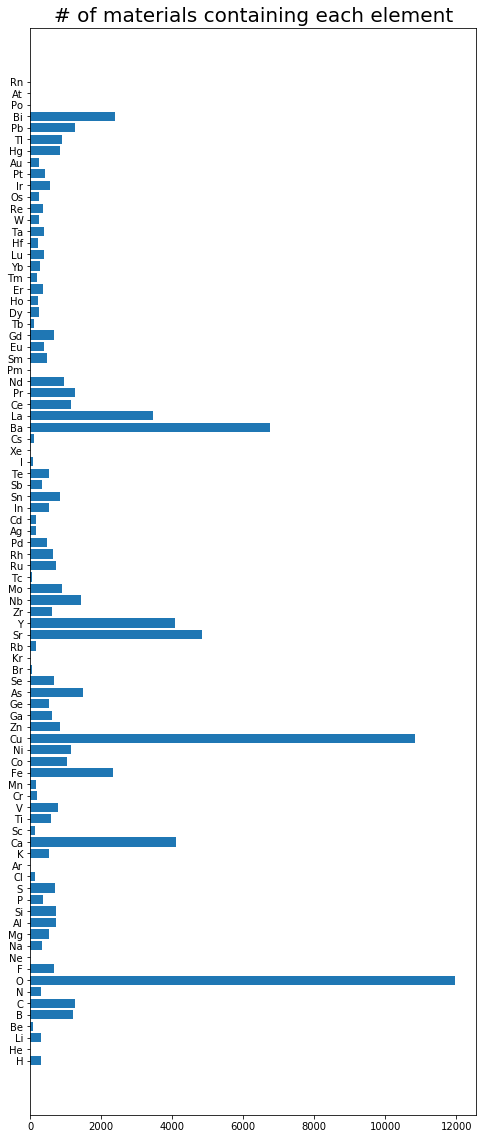

In [11]:
vis_data(unique_data,('All Materials in Dataset','# of materials containing each element'))

### $T_c<10K$. 

A majority contain copper and oxygen, because the majority of all of the materials in the dataset contain Cu and O.


 Number of Low Temp Superconducting Materials:  7729


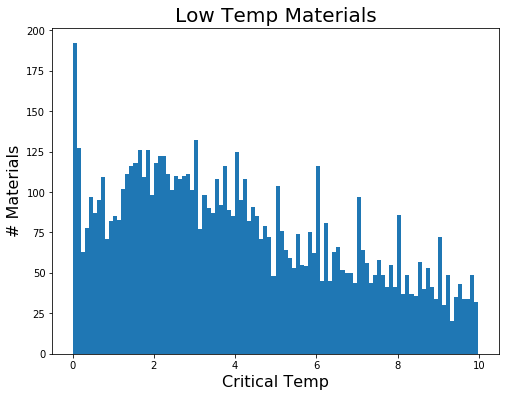

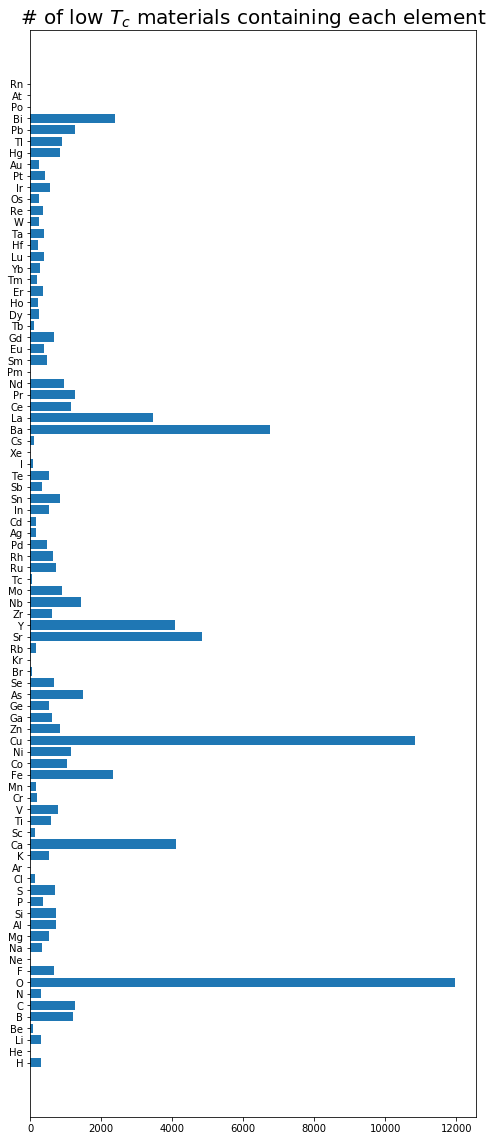

In [13]:
vis_data(lowt_data,('Low Temp Materials','# of low $T_c$ materials containing each element'))
print('\n Number of Low Temp Superconducting Materials: ', len(lowt_data[unique_y]))

### Iron based super conductors

Many on the lower temperature end, but also many high temp.


 Number of Iron Based Superconducting Materials:  2339


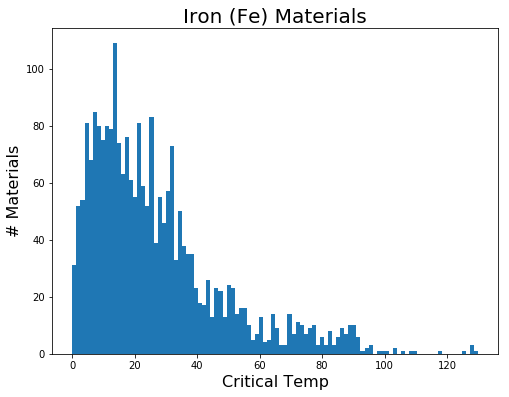

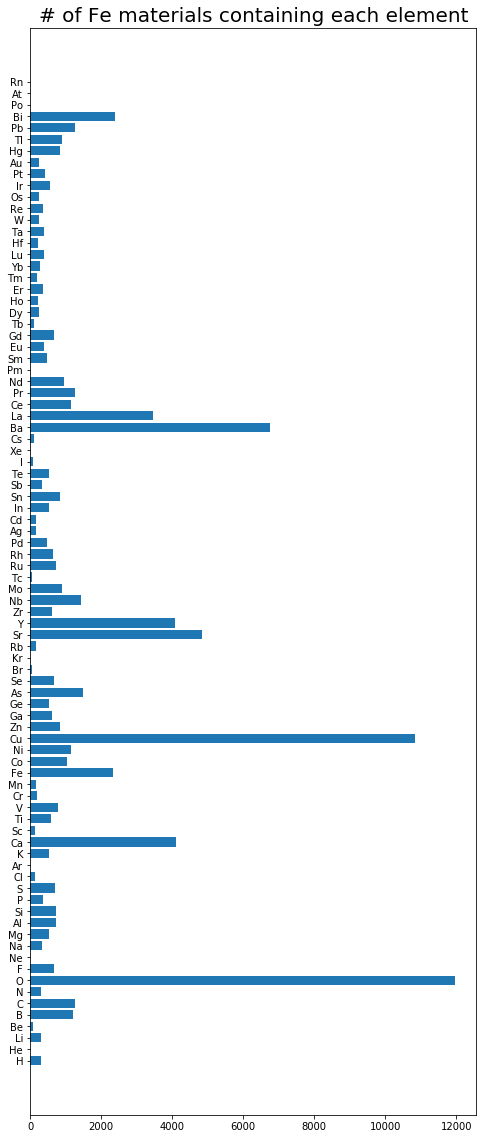

In [9]:
vis_data(fe_data,('Iron (Fe) Materials','# of Fe materials containing each element'))
print('\n Number of Iron Based Superconducting Materials: ', len(fe_data[unique_y]))

### Superconductors with Cu and O


 Number of HTC Superconducting Materials:  10532


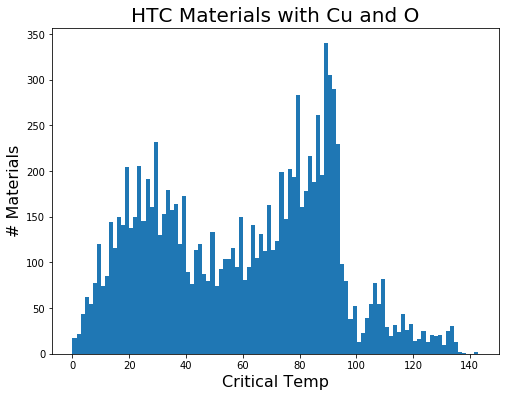

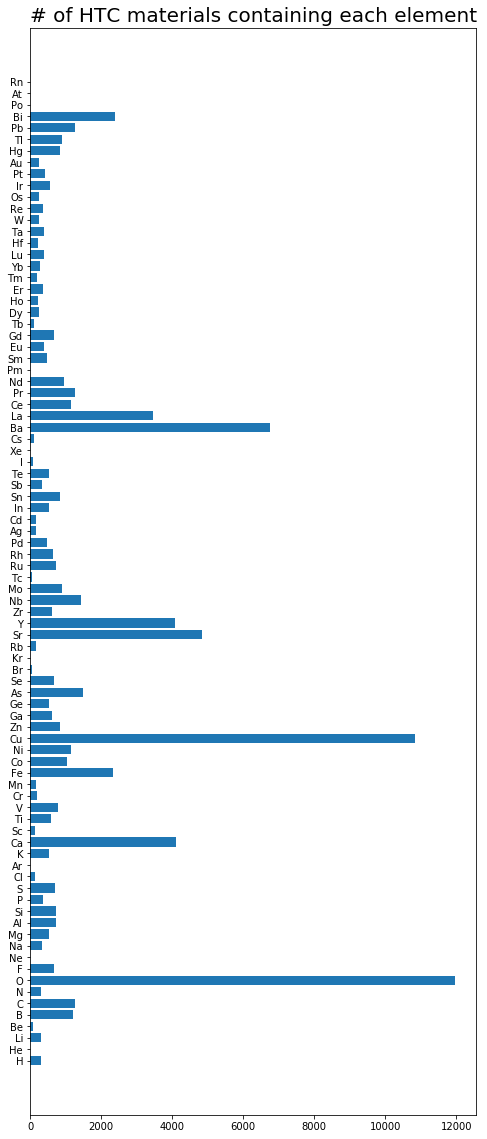

In [10]:
vis_data(htc_data,('HTC Materials with Cu and O','# of HTC materials containing each element'))
print('\n Number of HTC Superconducting Materials: ', len(htc_data[unique_y]))

### Superconductors with Cu and O (1:2)

Much higher proportion of these materials on the higher end of the temp scale than for all Cu and O materials.


 Number of Copper and Oxygen 1:2 Superconducting Materials:  3902


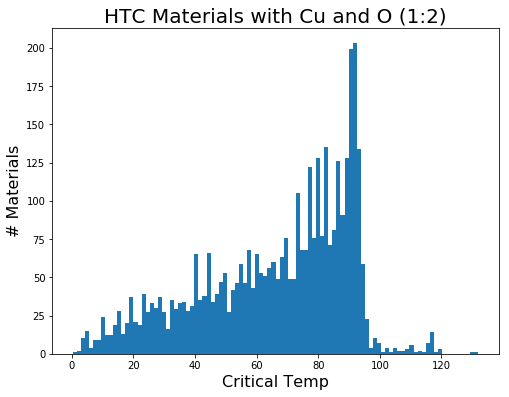

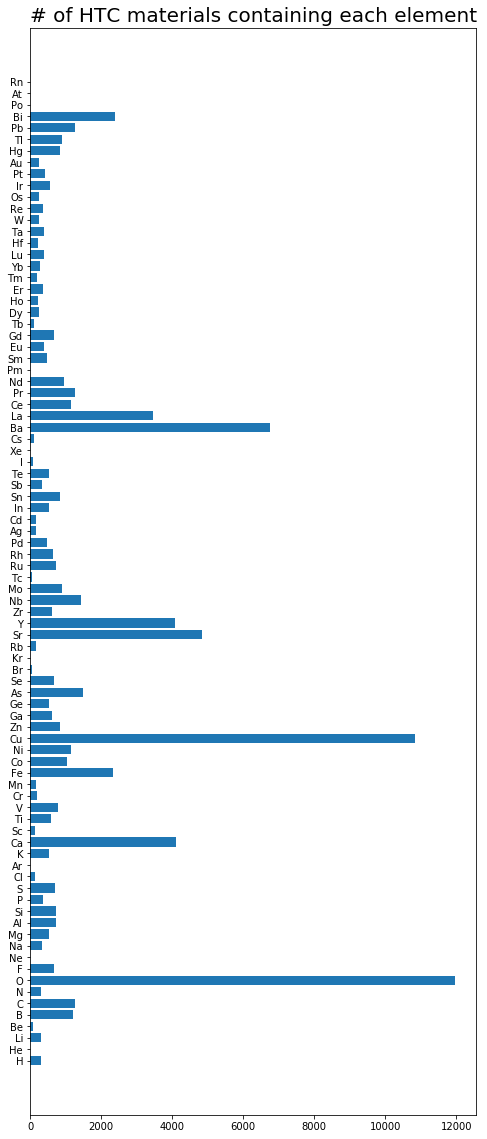

In [15]:
vis_data(htcr_data,('HTC Materials with Cu and O (1:2)','# of HTC materials containing each element'))
print('\n Number of Copper and Oxygen 1:2 Superconducting Materials: ', len(htcr_data[unique_y]))

### Part 3 - Dimensionality reduction

Apply dimensionalty reduction (see project 3, for example principle component analysis (PCA)) to the dataset. What can you learn about the data? visualize your results.


### Implement PCA

In [8]:
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

def do_iso(x_data, y_data, n_components):
    iso = Isomap(n_components=2)
    projected = iso.fit_transform(x_data)
    plt.figure(figsize = (12,8))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=y_data, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('seismic'))
    plt.title('Isomap Reduction n='+str(n_components), fontsize=16)
    plt.xlabel('component 1', fontsize=16)
    plt.ylabel('component 2', fontsize=16)
    plt.colorbar();

def do_pca(x_data, y_data, n_components):
    pca = PCA(n_components = n_components)
    projected = pca.fit_transform(x_data)

    plt.figure(figsize = (12,8))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=y_data, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('seismic'))
    plt.title('PCA Reduction n='+str(n_components), fontsize=16)
    plt.xlabel('component 1', fontsize=16)
    plt.ylabel('component 2', fontsize=16)
    plt.colorbar();
    
    print('The  values represent the importance of each of the component axes in classifying the dataset:')
    print('explained variance: ', pca.explained_variance_)
    
    return pca


### All Data

The dataset does not reduce to two dimensions as clearly as some, and it's not clear from the 2 dimensional reduction which method is better between Isomap and PCA. I decided to use PCA for the rest of the project, for ease of computation.

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [26.10036897 22.34819639]


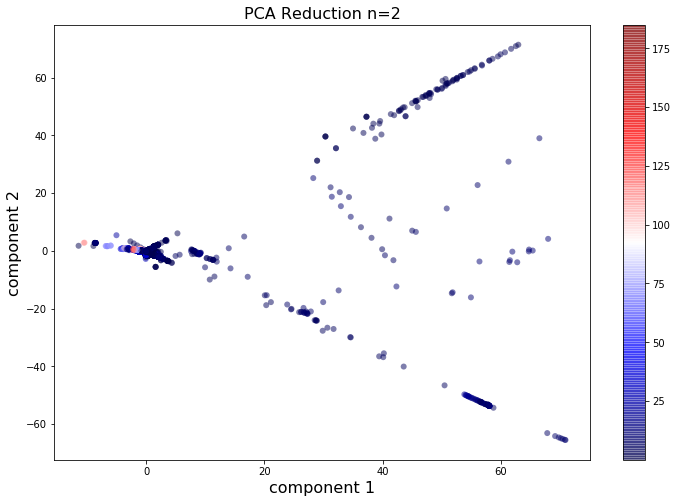

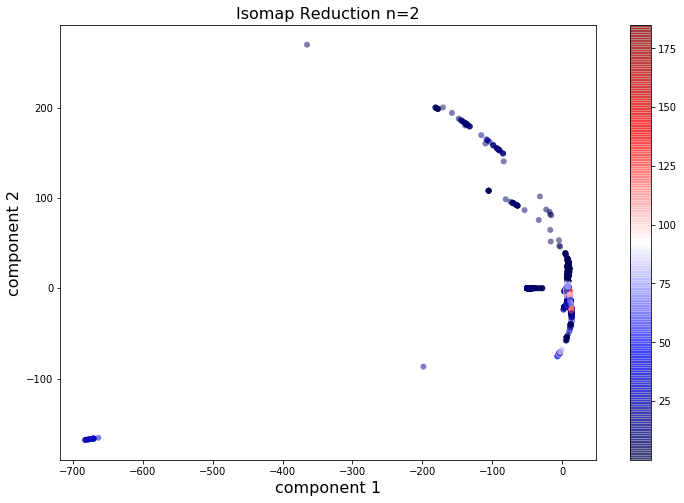

In [19]:
unique_pca = do_pca(unique_data[unique_x],unique_data[unique_y],2)
unique_iso = do_iso(unique_data[unique_x],unique_data[unique_y],2)

### Low Temp Data

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [63.97482781 38.046934  ]


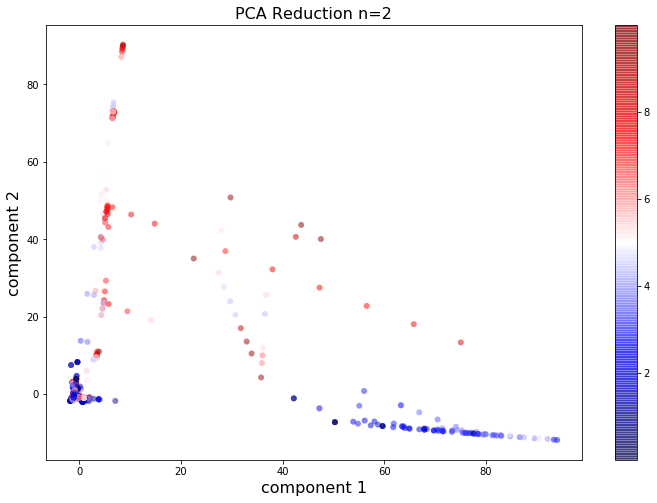

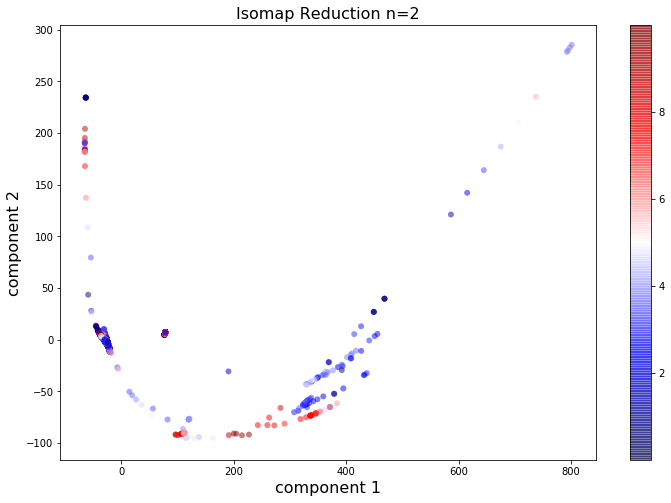

In [17]:
lowt_pca = do_pca(lowt_data[unique_x],lowt_data[unique_y],2)
lowt_iso = do_iso(lowt_data[unique_x],lowt_data[unique_y],2)


### Iron Data

Neither methods look that great for this dataset.

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [17.29132544 13.94467679]


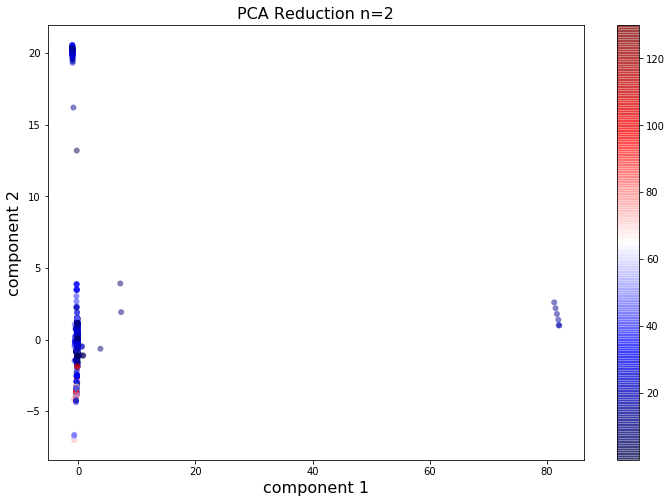

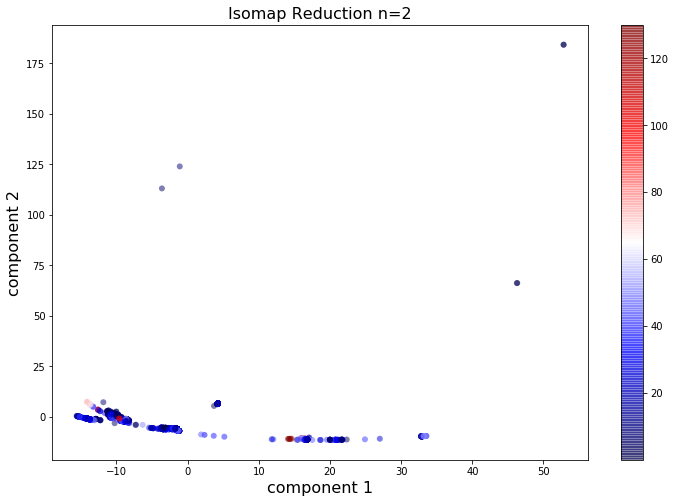

In [20]:
fe_pca = do_pca(fe_data[unique_x],fe_data[unique_y],2)
fe_iso = do_iso(fe_data[unique_x],fe_data[unique_y],2)

### HTC Data


The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [13.12141042  3.30043536]


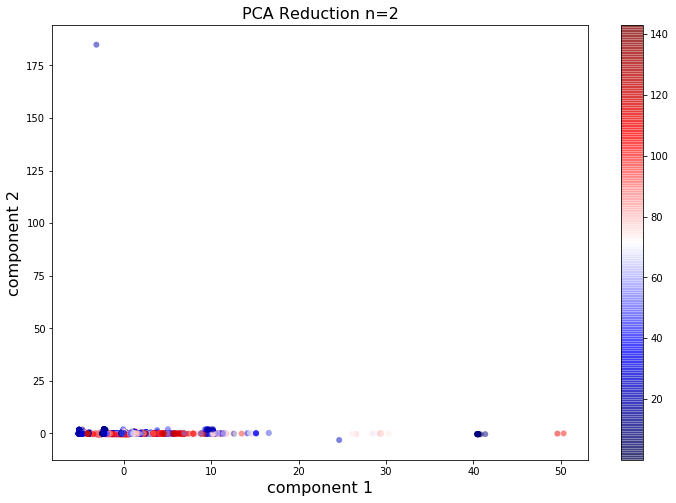

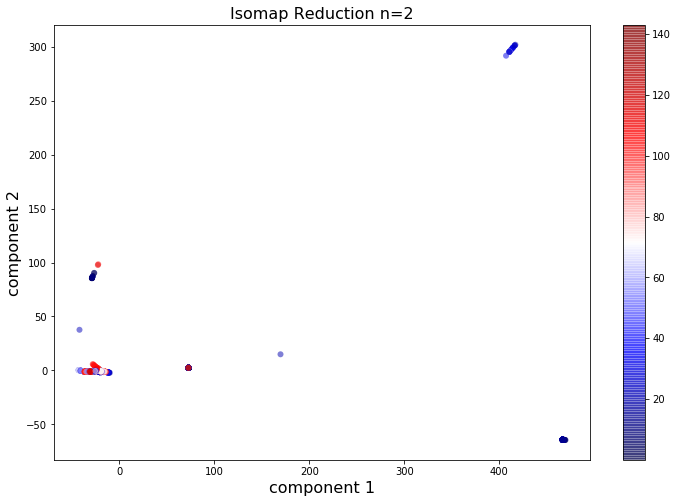

In [21]:
htc_pca = do_pca(htc_data[unique_x],htc_data[unique_y],2)
htc_iso = do_iso(htc_data[unique_x],htc_data[unique_y],2)

### HTC CU:O (1:2) Data

Widest 2-d spread of the data, but no clear patterns. Maybe a clustering algorithm would work well? 

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [11.34381398  0.81993515]


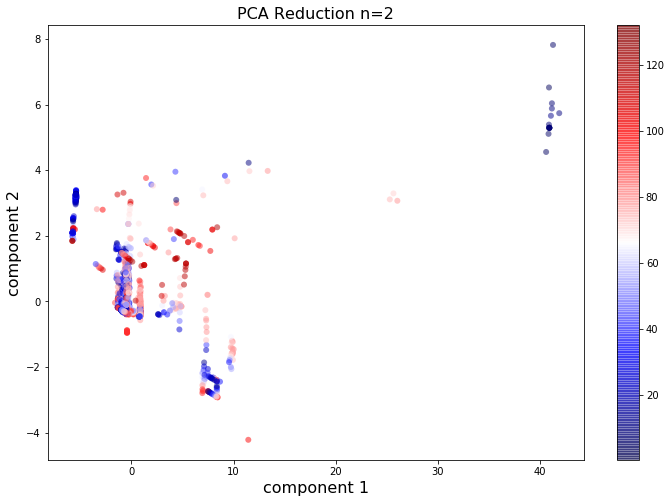

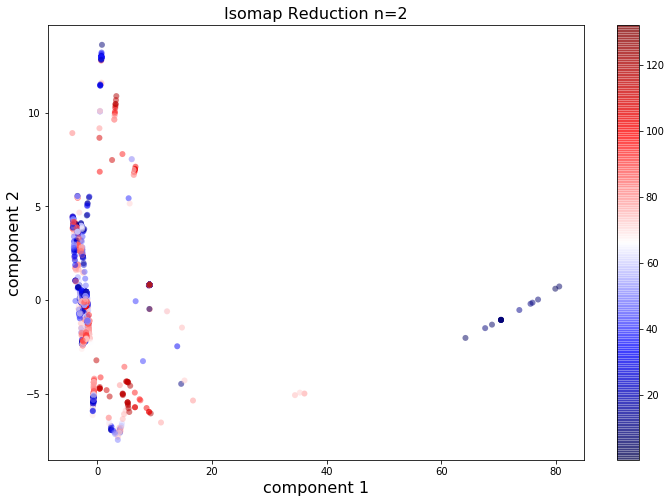

In [22]:
htcr_pca = do_pca(htcr_data[unique_x],htcr_data[unique_y],2)
htcr_iso = do_iso(htcr_data[unique_x],htcr_data[unique_y],2)

### Part 4 - Random Forests

Follow the example of the Stanev paper and apply Random Forest machine learning models to the data to predict the superconducting transition temperature. Use standard techniques discussed in class such as training and test data and cross-validation.

Consider both the entire dataset and the superconductor categories discussed in the Stanev paper (and listed in part 2) 
Discuss your models and use suitable graphs to document your work.

What predictions does your model make for the potential superconducting materials listed in table 6 of the Hamidieh paper? 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# split data into training and test set for cross validation
def split(x_data,y_data):
    x_training, x_test, y_training, y_test = train_test_split(x_data, y_data)
    return x_training,y_training,x_test,y_test

# reduce dimensions of dataset
def reduce_dim(method, n_components, x_data):
    mth = method(n_components=n_components)
    return mth.fit_transform(x_data)

#Prepare train, test, validation data with PCA reduction. pdata: scaled. tdata: non-scaled. 
def project(pcadim):
    scaler = StandardScaler()
    tdata = {'all':split(reduce_dim(PCA,pcadim,datax['all']),datay['all']),
            'low':split(reduce_dim(PCA,pcadim,datax['low']),datay['low']), 
            'fe':split(reduce_dim(PCA,pcadim,datax['fe']),datay['fe']),
            'htc':split(reduce_dim(PCA,pcadim,datax['htc']),datay['htc']),
            'htcr':split(reduce_dim(PCA,pcadim,datax['htcr']),datax['htcr'])}
    pdata = {'all':split(scaler.fit_transform(reduce_dim(PCA,pcadim,datax['all'])),datay['all']),
            'low':split(scaler.fit_transform(reduce_dim(PCA,pcadim,datax['low'])),datay['low']), 
            'fe':split(scaler.fit_transform(reduce_dim(PCA,pcadim,datax['fe'])),datay['fe']),
            'htc':split(scaler.fit_transform(reduce_dim(PCA,pcadim,datax['htc'])),datay['htc']),
            'htcr':split(scaler.fit_transform(reduce_dim(PCA,pcadim,datax['htcr'])),datax['htcr'])}
    return tdata,pdata

def forest(train_data, n_estimators=250, depth=20):
    rfc = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=0)
    rfc.fit(train_data[0],train_data[1])
    return rfc,rfc.score(train_data[2],train_data[3])

def mlp(train_data, hidden=[250,250,250,250,250]):
    nn = MLPRegressor(hidden_layer_sizes=hidden,  
                      activation='relu', solver='adam', 
                      alpha=0.001, batch_size='auto',
                      learning_rate='constant', learning_rate_init=0.01, 
                      power_t=0.5, max_iter=2000,
                      shuffle=True, random_state=0, 
                      tol=0.0001, verbose=False, 
                      warm_start=False, momentum=0.9, 
                      nesterovs_momentum=True,
                      early_stopping=False, 
                      validation_fraction=0.1, 
                      beta_1=0.9, 
                      beta_2=0.999, 
                      epsilon=1e-08)

    nn.fit(train_data[0],train_data[1])
    return nn, nn.score(train_data[2],train_data[3])

### Grid Search

#### Find best values for n_estimators and max_depth for Random Forest Regressor:

Note: This takes quite a while to run. Results below.. 

n_estimators: 250
max_depth: 20

In [14]:
data = pdata5['all']

params = {'n_estimators':[50,100,250,500], 'max_depth':[5,10,20,30]}
rfc = RandomForestRegressor(n_jobs=2)
clf = GridSearchCV(rfc, params, cv=3)
t= clf.fit(data[0],data[1])
print(clf.best_params_)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 250, 500], 'max_depth': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print(clf.best_params_)
print(clf.best_score_)

print('Validation Score: ',clf.score(pdata5['all'][2],pdata5['all'][3]))

{'max_depth': 20, 'n_estimators': 250}
0.8470412636482807
Validation Score:  0.8497207818871817


### Part 5 - Other  machine learning models

Apply and discuss another machine learning model (discussed in class or in the textbook) to the data. How does it compare to random forests? Why does it perform better (or worse) than random forests?


### Implement Multilayer Perceptron Regressor

(See visualizations of models below)

### Grid Search

#### Find best values of n_hidden for Multilayer Perceptron:

n_hidden: [250, 250, 250, 250, 250]

In [9]:
hidden=[]
units = [50,100,250]
layers = [5,10,15,20]
for unit in units:
    for layer in layers:
        h = []
        for j in range(layer):
            h.append(unit)
        hidden.append(h)
print(hidden)

[[50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [250, 250, 250, 250, 250], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


In [10]:
params = {'hidden_layer_sizes':hidden}
nn = MLPRegressor(activation='relu', solver='adam', 
                  alpha=0.001, batch_size='auto',
                  learning_rate='constant', learning_rate_init=0.001, 
                  power_t=0.5, max_iter=5000,
                  shuffle=True, random_state=0, 
                  tol=0.0001, verbose=False, 
                  warm_start=False, momentum=0.9, 
                  nesterovs_momentum=True,
                  early_stopping=False, 
                  validation_fraction=0.1, 
                  beta_1=0.9, 
                  beta_2=0.999, 
                  epsilon=1e-08)

data = pdata5['all']
clf_nn = GridSearchCV(nn, params, cv=3,verbose = 2,n_jobs=2)
clf_nn.fit(data[0],data[1])
print(clf_nn.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed: 41.0min finished


{'hidden_layer_sizes': [250, 250, 250, 250, 250]}


In [14]:
print('best params: ',clf_nn.best_params_)
print('best score: ',clf_nn.best_score_)

best params:  {'hidden_layer_sizes': [250, 250, 250, 250, 250]}
best score:  0.7387813092476102


### Predict new materials

Trained an MLP and a Random Forest on the full dataset, then used it to predict the critical temperature of the first 8 materials in table 6 of the Hamidieh paper. My predictions were not very close to the paper's predictions, but that's to be expected since they used elemental properties as parameters, and I didn't.

In [30]:
depth = 20
n_estimators = 250
h = [250,250,250,250,250]
train_data1 = split(datax['all'],datay['all'])
rfc1,rfcscore1 = forest(train_data1,n_estimators,depth)
nn1,nnscore1 = mlp(train_data1,h)

print('RF Score: ', rfcscore1)
print('MLP Score: ', nnscore1)

RF Score:  0.9192698140451137
MLP Score:  0.894579445541888


In [34]:
print('RF Score (New Materials): ',rfc1.score(new_datax,new_datay))
print('MLP Score (New Materials): ',nn1.score(new_datax,new_datay))

new_material_pred = pd.DataFrame({'Material': new_data[material_names],'Paper Predictions': new_datay,'RF Predictions: ': rfc1.predict(new_datax), 'MLP Predictions: ':nn1.predict(new_datax)})
print(new_material_pred)

RF Score (New Materials):  -0.5563985355119245
MLP Score (New Materials):  -0.6829637687296637
              Material  Paper Predictions  RF Predictions:   MLP Predictions: 
0           CsBe(AsO4)               13.7          3.469868           3.794330
1               RbAsO2                8.0          6.903224           4.176299
2                KSbO2               10.2          7.563047           4.767268
3               RbSbO2               11.5          6.898685           6.750765
4               CsSbO2               10.1          3.414093           2.997645
5  K0.8(Li0.2Sn0.76)O2               53.3          7.973697           8.953009
6       Cs(MoZn)(O3F3)               18.6          6.264652           6.778793
7         Na3Cd2(IrO6)               20.5         18.116785           4.258653


#### Not a very good score (assuming the predictions in the paper are accurate)... I don't think the elemental makeup is enough information alone to predict critical temp. Still, the Random Forest did slightly better than the MLP.

### Visualize the Prediction Error on the different sets of data:

In this section I trained each both models on each dataset, and for some of the datasets I varied the training data (scaled vs. non-scaled, PCA dimensions) to see if there was a substantial difference in the fit. Overall, the Random Forest did better than the MLP, which may not be true if input paramaters other than elemental makeup of the materials are used.

For the prediction error in the plots below, I calculated error = (predicted $T_c$) - (true $T_c$). If the predicted $T_c$ is too high, the error will be the positive difference. If the predicted $T_c$ is low, it will be the negative difference. Both models seem to balance the net positive and negative predictions across the dataset. The MLP predictions have an interesting structure. There is linear "streaking" of the predictions. This may shed light on the nature of the predictions being made by the MLP. For the MLP, the predictions are too high on the low temperature end and too low on the high temperature end. This leads me to think there could be much improvement in training and structuring that model. It may also point to a lack of information fed into the model.

In [5]:
def vis_predict(dataset,pcadim,nnhidden,rfcdepth,rfcestimators,scaled=True):
    # labels = [title,nnscore,rfcscore]
    tdata,sdata = project(pcadim)
    if(scaled):
        train_data = sdata[dataset]
        dataset+=' (scaled)'
    else:
        train_data = tdata[dataset]
    nn,nnscore = mlp(train_data,nnhidden)
    rfc,rfcscore = forest(train_data,rfcestimators,rfcdepth)
    
    test_x = train_data[2]
    test_ynn = nn.predict(test_x)
    test_yrfc = rfc.predict(test_x)

    x = train_data[3]
    fig, ax1 = plt.subplots(nrows=2, ncols=1)
    ax1[0].scatter(x, test_ynn-x, s=1, c='b', marker="s", label='real')
    ax1[0].plot(np.arange(np.min(x),np.max(x),.1),np.arange(np.min(x),np.max(x),.1)*0)
    ax1[0].set_xlabel(r'$T_c$', fontsize=16)
    ax1[0].set_ylabel(r'Pred. Error $T_c$', fontsize=16)
    ax1[0].set_title(str(r'MLP Regressor   $R^2$ = '+str(round(nnscore,3))), fontsize=20)
    
    ax1[1].scatter(x, test_yrfc-x, s=1, c='g', marker="s", label='real')
    ax1[1].plot(np.arange(np.min(x),np.max(x),.1),np.arange(np.min(x),np.max(x),.1)*0)
    ax1[1].set_xlabel(r'$T_c$', fontsize=16)
    ax1[1].set_ylabel(r'Pred. Error $T_c$', fontsize=16)
    ax1[1].set_title(str(r'Random Forest   $R^2$ = '+str(round(rfcscore,3))), fontsize=20)
    
    fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=-3)
    fig.set_figheight(10)
    fig.set_figwidth(12)
    fig.suptitle('dataset: '+dataset+'   pca='+str(pcadim), fontsize=26)
    

In [6]:
depth = 20
n_estimators = 250
h = [250,250,250,250,250]

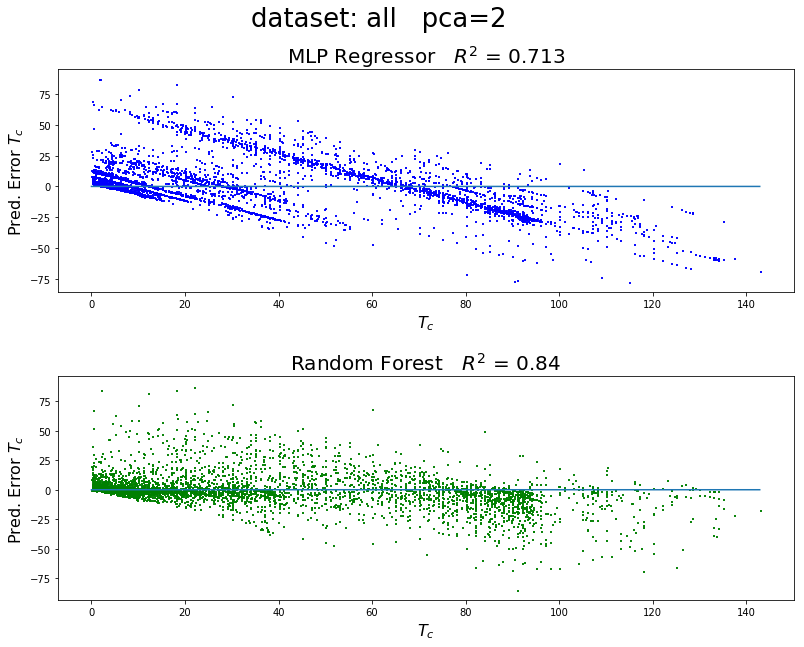

In [20]:
vis_predict('all',2,h,depth,n_estimators,scaled=False)

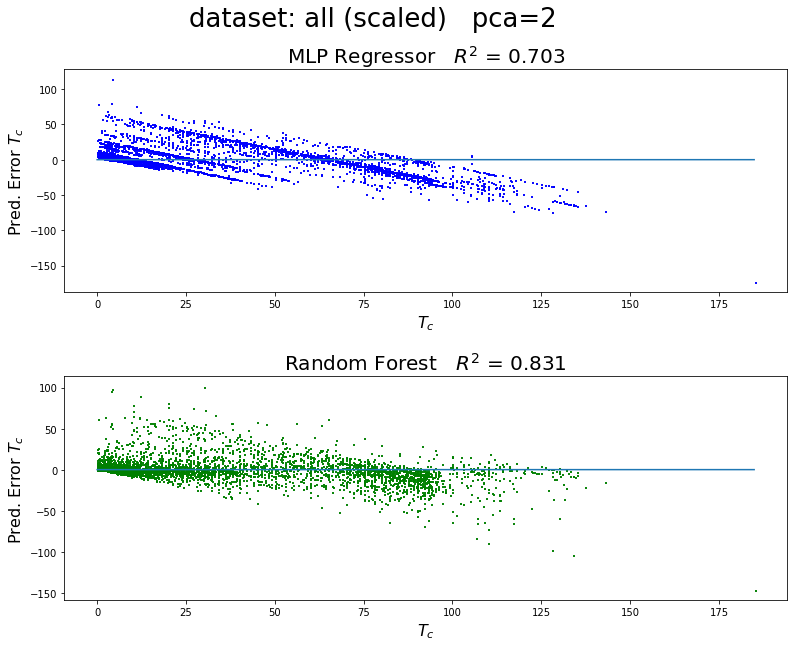

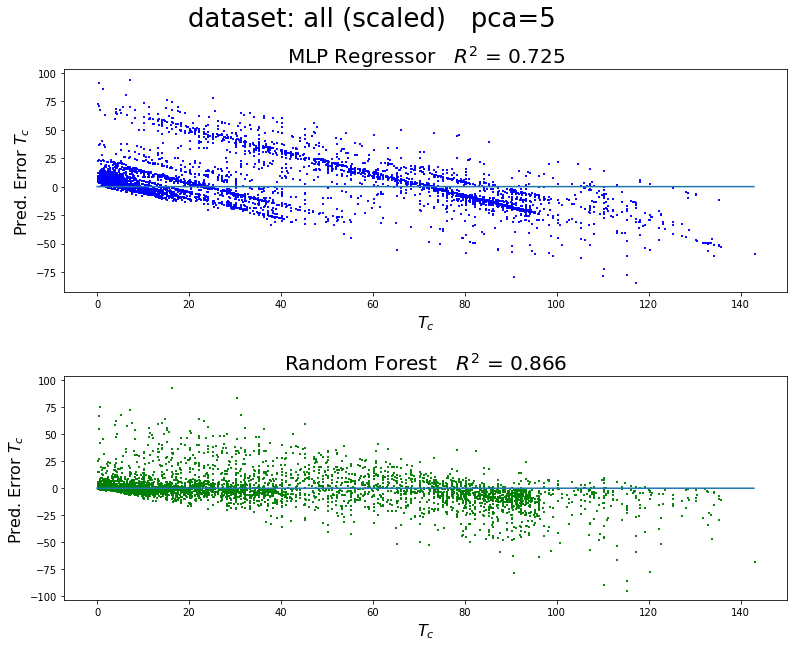

In [24]:
vis_predict('all',2,h,depth,n_estimators)

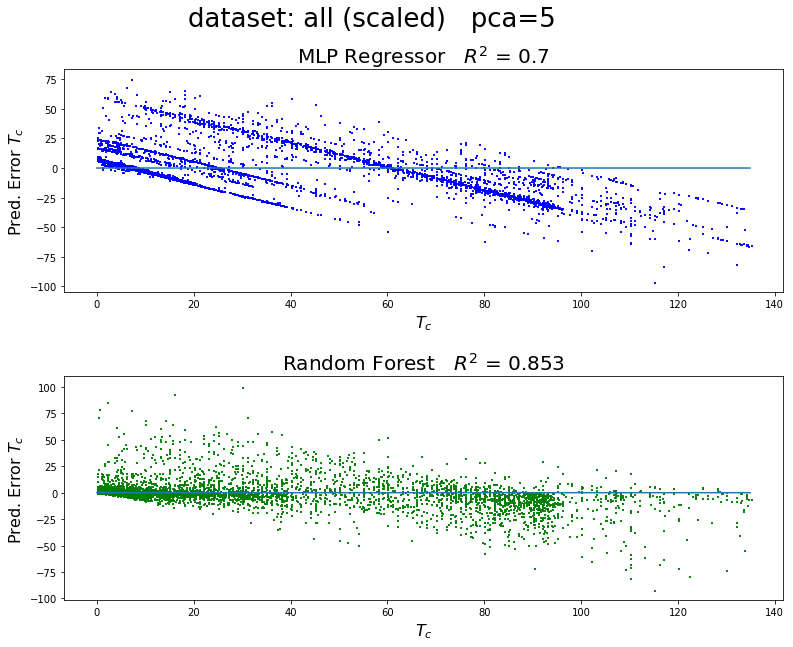

In [11]:
vis_predict('all',5,h,depth,n_estimators)

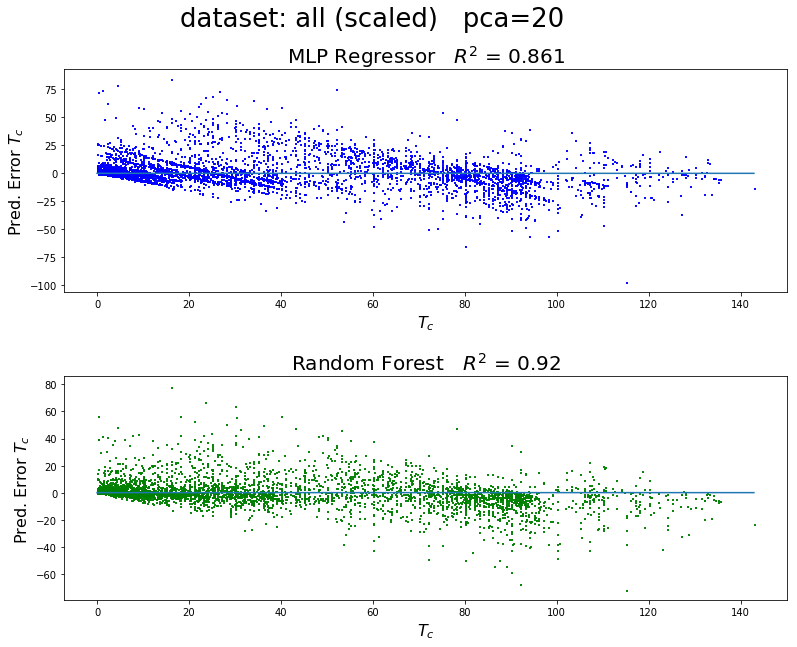

In [13]:
vis_predict('all',20,h,depth,n_estimators)

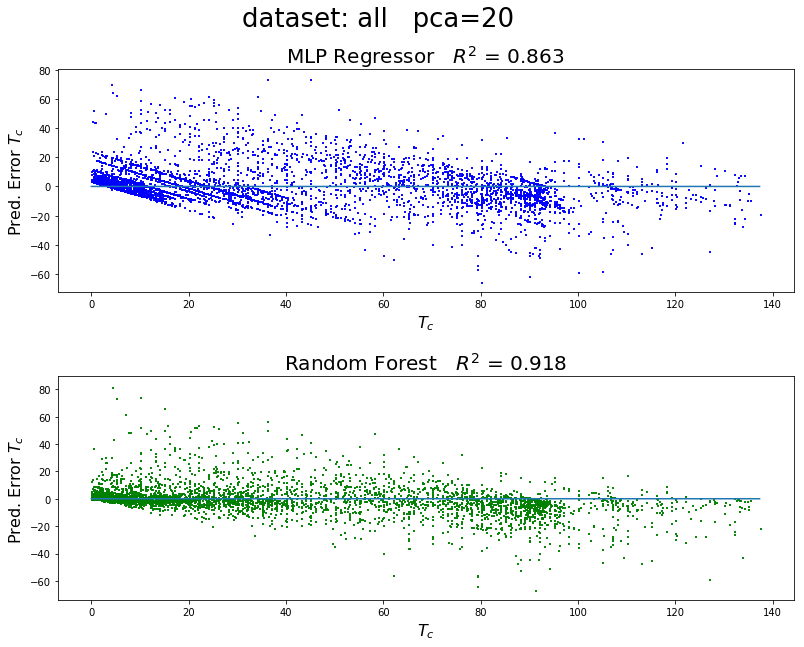

In [12]:
vis_predict('all',20,h,depth,n_estimators, scaled=False)

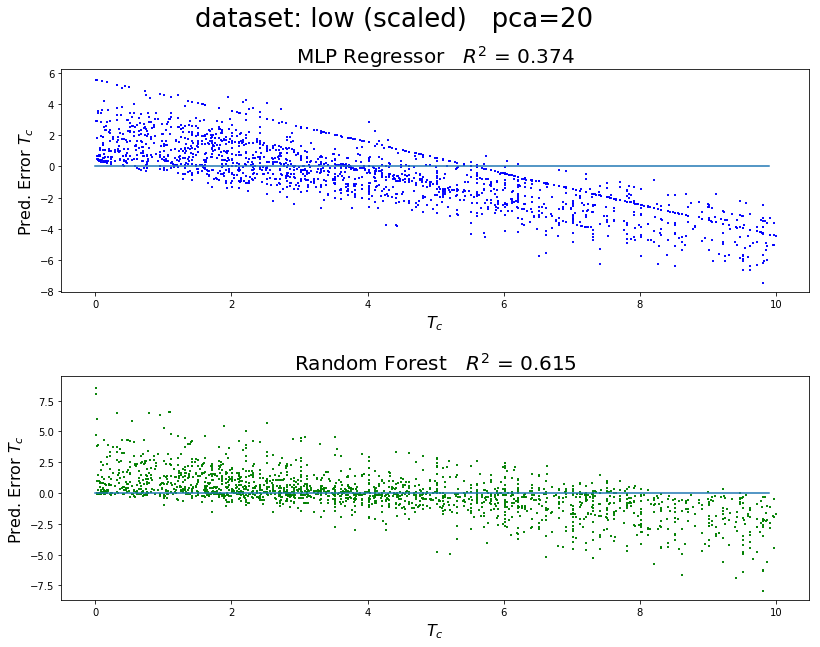

In [15]:
vis_predict('low',20,h,depth,n_estimators)

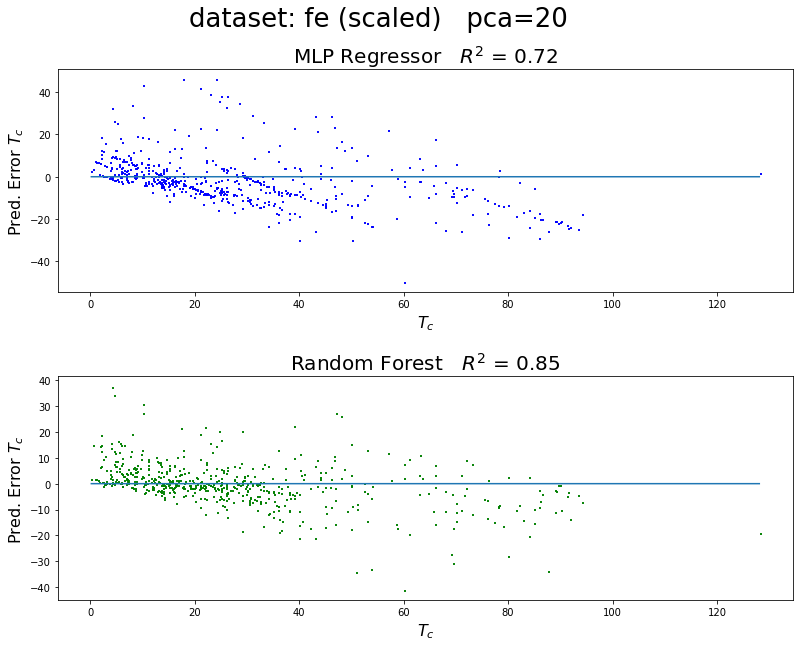

In [16]:
vis_predict('fe',20,h,depth,n_estimators)

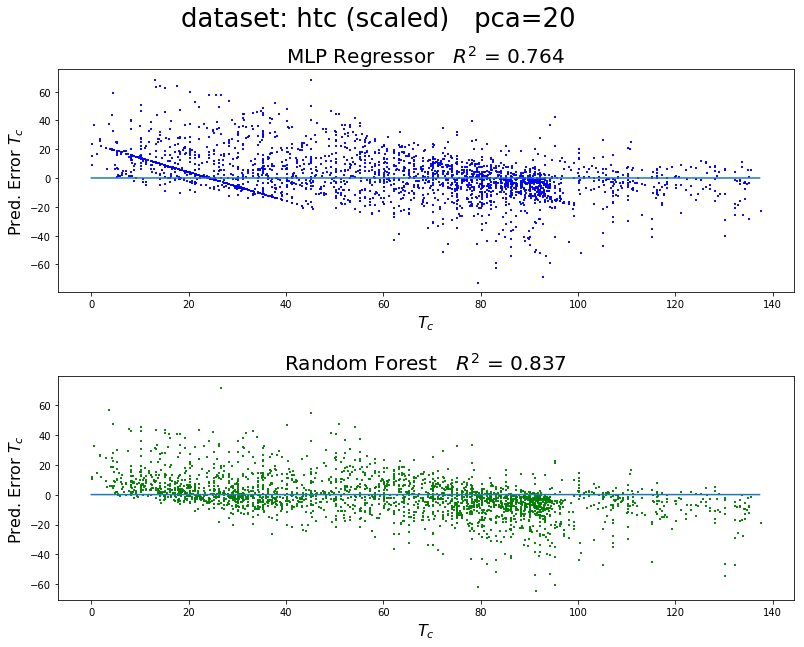

In [ ]:
vis_predict('htc',20,h,depth,n_estimators)